# Titanic survived passanger prediction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import numpy as np

In [11]:
char_Cabin=data['Cabin'].astype(str)
new_Cabin=np.array([Cabin[0] for Cabin in char_Cabin])
new_Cabin=pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [12]:
data['Age']=data['Age'].fillna(data['Age'].mode()[0])

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [18]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
data.shape

(891, 12)

In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DATA ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
label=le.fit_transform(data["Sex"])
label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [25]:
le.classes_

array(['female', 'male'], dtype=object)

In [26]:
data=data.drop("Sex",axis='columns')

In [27]:
data["Sex"]=label

In [28]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,B96 B98,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [29]:
le=LabelEncoder()
label=le.fit_transform(data["Ticket"])
label

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 395, 329,
       179,  95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302,
       186, 507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522,
       587, 239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601,
       189, 553, 623, 248, 270, 557, 566, 621, 204,  80, 347, 355, 473,
       158, 432, 304, 311, 280,  25, 637, 247, 676, 652,  95, 297, 298,
       341, 678, 548, 428, 475, 607, 612, 117, 150, 384, 361, 417, 505,
       245, 354, 296, 254, 388, 469,   2, 193, 274, 491, 176, 666, 460,
        53, 585, 333, 621, 540, 132, 219, 417, 186, 463, 541, 196, 318,
       380, 640, 537, 111, 552, 630,  55,  49, 504, 592, 203, 332, 668,
       438, 118, 558, 405, 676, 113, 147, 622,  36, 516, 538, 573, 595,
       418, 654, 258, 568, 470, 559, 323, 265, 249, 423,  28, 337, 576,
        80,   5, 480, 344, 659,  90, 412, 488, 593, 169, 574, 56

In [30]:
data=data.drop("Ticket",axis='columns')

In [31]:
data["Ticket"]=label

In [32]:
le=LabelEncoder()
label=le.fit_transform(data["Cabin"])
label

array([ 47,  81,  47,  55,  47,  47, 129,  47,  47,  47, 145,  49,  47,
        47,  47,  47,  47,  47,  47,  47,  47, 111,  47,  13,  47,  47,
        47,  63,  47,  47,  47,  41,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
       101,  47,  23,  71,  47,  47,  47,  47,  47,  21,  80,  47,  47,
        47, 142,  47,  47,  47,  47,  47,  47,  47,  47, 140,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  63,  47,  47,
        47, 122,  47,  47,  47,  12,  91,  47,  47,  47,  47,  98,  47,
        47,  47,  47,  47,  47,  47,  52,  47,  47,  47,  47,  47,  47,
        47,  36,  47,  47,  47,  47, 116,  98,  47,  47,  47, 138,  47,
        47,  47,  47,  47,  47,  47, 107,  55,  47,  45,  47,  47,  47,
        47,  47,  47,  47,  47, 141,  47,  47,  61,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47, 123,  47,  47,
        47,  18,  47,  47,  47,  14,  47,  47,  69,  47,  47,  4

In [33]:
data=data.drop("Cabin",axis='columns')

In [34]:
data["Cabin"]=label

In [35]:
le=LabelEncoder()
label=le.fit_transform(data["Embarked"])
label

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [36]:
data=data.drop("Embarked",axis='columns')

In [37]:
data["Embarked"]=label

In [38]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,523,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,596,81,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,669,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,49,55,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,472,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,101,47,2
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,14,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,23.4500,0,675,47,2
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,8,60,0


In [39]:
le=LabelEncoder()
label=le.fit_transform(data["Name"])
label

array([108, 190, 353, 272,  15, 554, 515, 624, 412, 576, 727,  95, 729,
        28, 840, 359, 682, 867, 839, 512, 273,  80, 523, 765, 626,  44,
       240, 260, 605, 813, 828, 776, 289, 856, 535, 372, 505, 134, 837,
       589,   7, 827, 446, 456, 212, 697, 473, 604, 726,  38, 629, 594,
       333, 246, 620, 873, 707, 595, 853, 299, 749, 385, 337, 755, 784,
       560, 596, 185,  25, 440, 396, 300, 376, 161,  87, 546, 778, 563,
       127, 223, 842, 737, 519, 141, 386,  52, 255, 764, 259, 149, 159,
        31, 150, 209, 184, 740, 292, 308, 219, 422, 656, 658, 858, 405,
       312, 542, 724, 559, 675, 552, 667, 882,  67, 417,  46, 645, 178,
       826,  70,  24, 362, 551, 575, 848, 857, 588, 525, 499, 653, 234,
       225, 165, 695, 851, 772, 685, 585, 271, 618, 282,  99, 597, 319,
       116,  32, 586,  29, 254, 580, 121,  68, 643, 532, 889, 612, 866,
       287, 181, 767, 716, 186, 847,  82, 129, 628, 293, 157, 760,  69,
       486, 832, 680, 408, 752, 769, 444, 464, 388, 320, 474, 71

In [40]:
data=data.drop("Name",axis='columns')

In [41]:
data["Name"]=label

In [42]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
0,1,0,3,22.0,1,0,7.2500,1,523,47,2,108
1,2,1,1,38.0,1,0,71.2833,0,596,81,0,190
2,3,1,3,26.0,0,0,7.9250,0,669,47,2,353
3,4,1,1,35.0,1,0,53.1000,0,49,55,2,272
4,5,0,3,35.0,0,0,8.0500,1,472,47,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,101,47,2,548
887,888,1,1,19.0,0,0,30.0000,0,14,30,2,303
888,889,0,3,24.0,1,2,23.4500,0,675,47,2,413
889,890,1,1,26.0,0,0,30.0000,1,8,60,0,81


In [43]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208,0.647587,338.528620,53.639731,1.536476,445.000000
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429,0.477990,200.850657,23.568293,0.791503,257.353842
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,158.500000,47.000000,1.000000,222.500000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,337.000000,47.000000,2.000000,445.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,519.500000,47.000000,2.000000,667.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,680.000000,146.000000,2.000000,890.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    int32  
 8   Ticket       891 non-null    int32  
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
 11  Name         891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


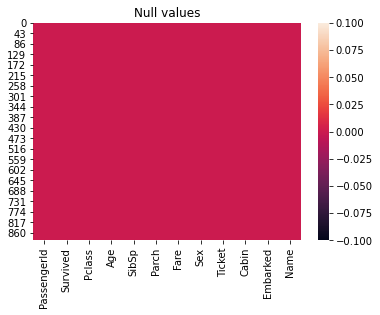

In [45]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [46]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658,0.042939,-0.056554,-0.018086,0.013128,-0.038559
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307,-0.543351,-0.164549,0.175690,-0.167675,-0.057343
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500,0.131900,0.319869,-0.248495,0.162098,0.052831
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.073377,-0.073202,0.070389,-0.000020,0.026379
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.114631,0.079461,-0.005539,0.068230,-0.017230
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.245489,0.020003,0.022682,0.039798,-0.049105
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000,-0.182333,-0.013885,0.090516,-0.224719,-0.049173
Sex,0.042939,-0.543351,0.131900,0.073377,-0.114631,-0.245489,-0.182333,1.000000,0.059372,-0.102643,0.108262,0.020314
Ticket,-0.056554,-0.164549,0.319869,-0.073202,0.079461,0.020003,-0.013885,0.059372,1.000000,-0.072200,-0.001729,0.047348
Cabin,-0.018086,0.175690,-0.248495,0.070389,-0.005539,0.022682,0.090516,-0.102643,-0.072200,1.000000,0.023804,0.034129


<AxesSubplot:>

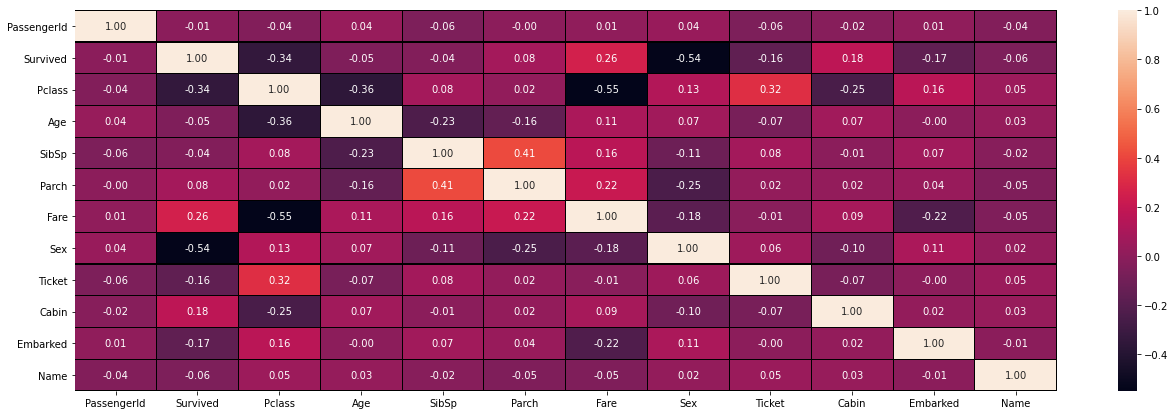

In [47]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

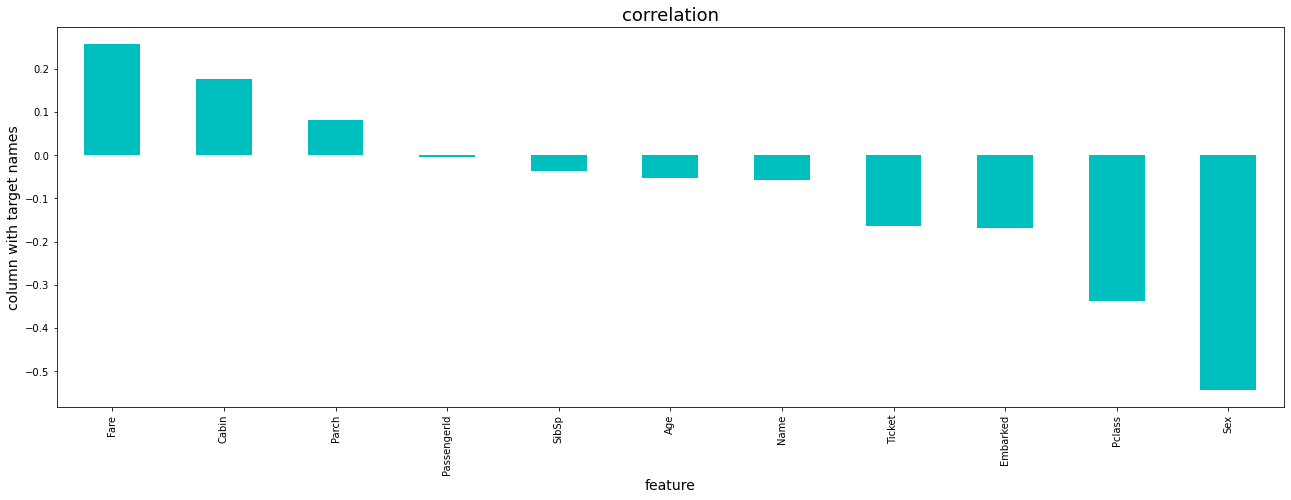

In [48]:
plt.figure(figsize=(22,7))
data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [49]:
import warnings
warnings.filterwarnings('ignore')

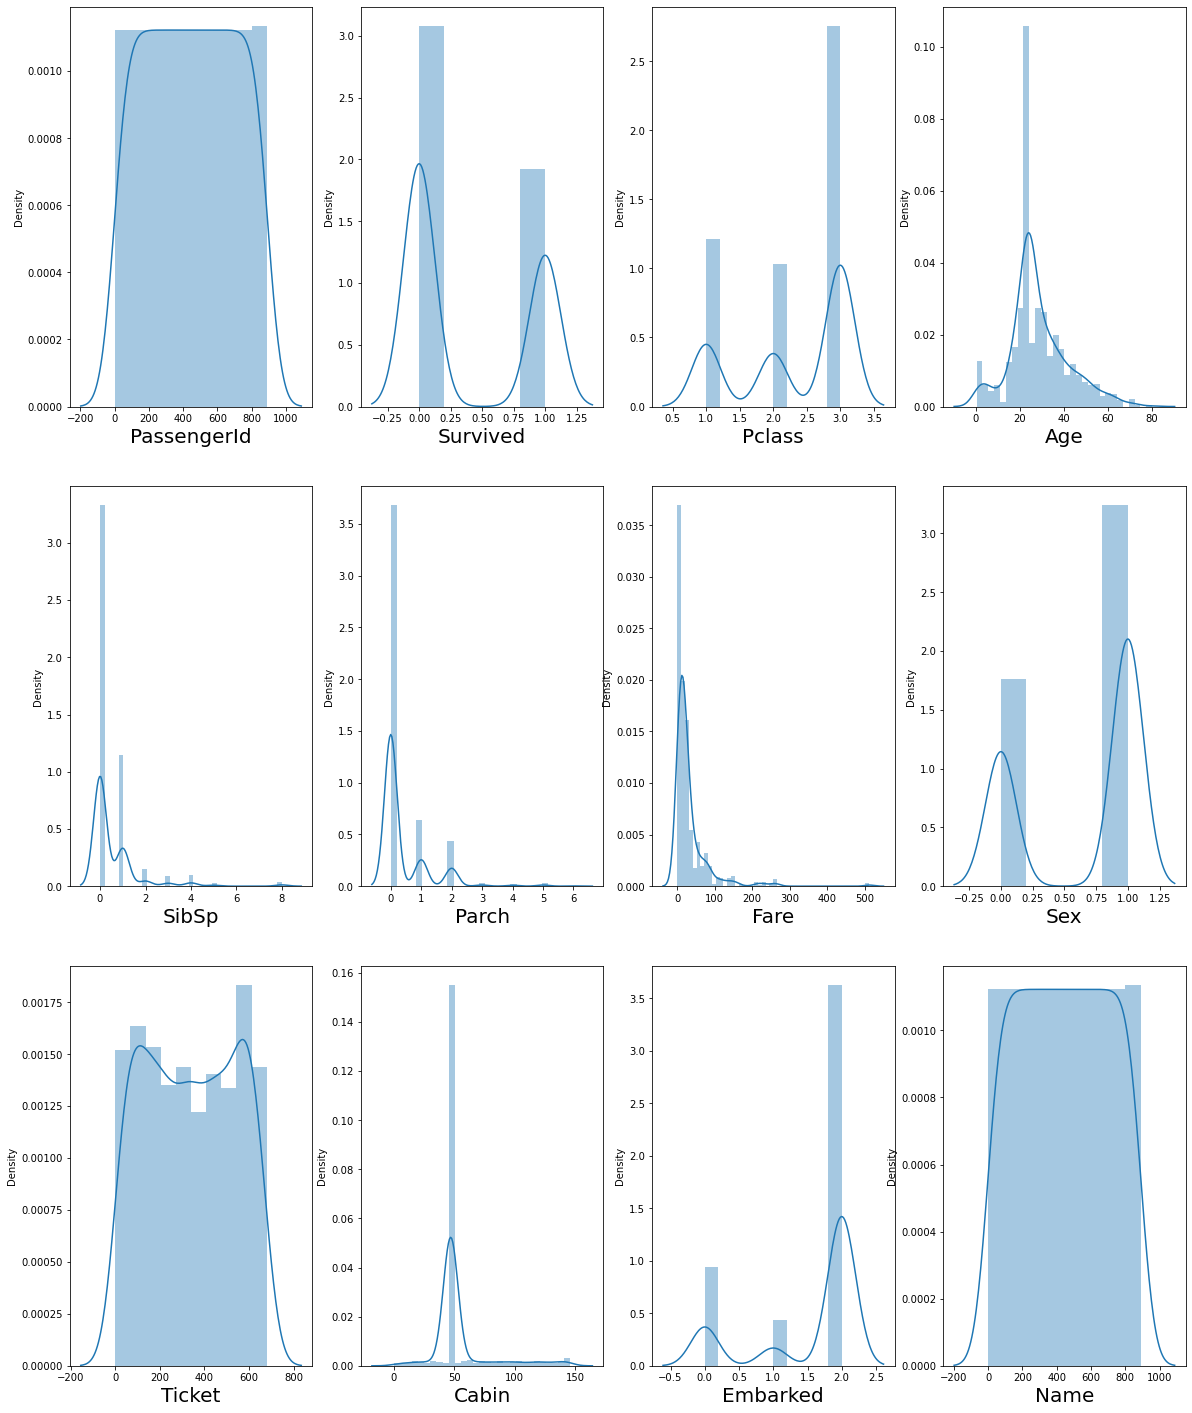

In [50]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [51]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name'],
      dtype='object')

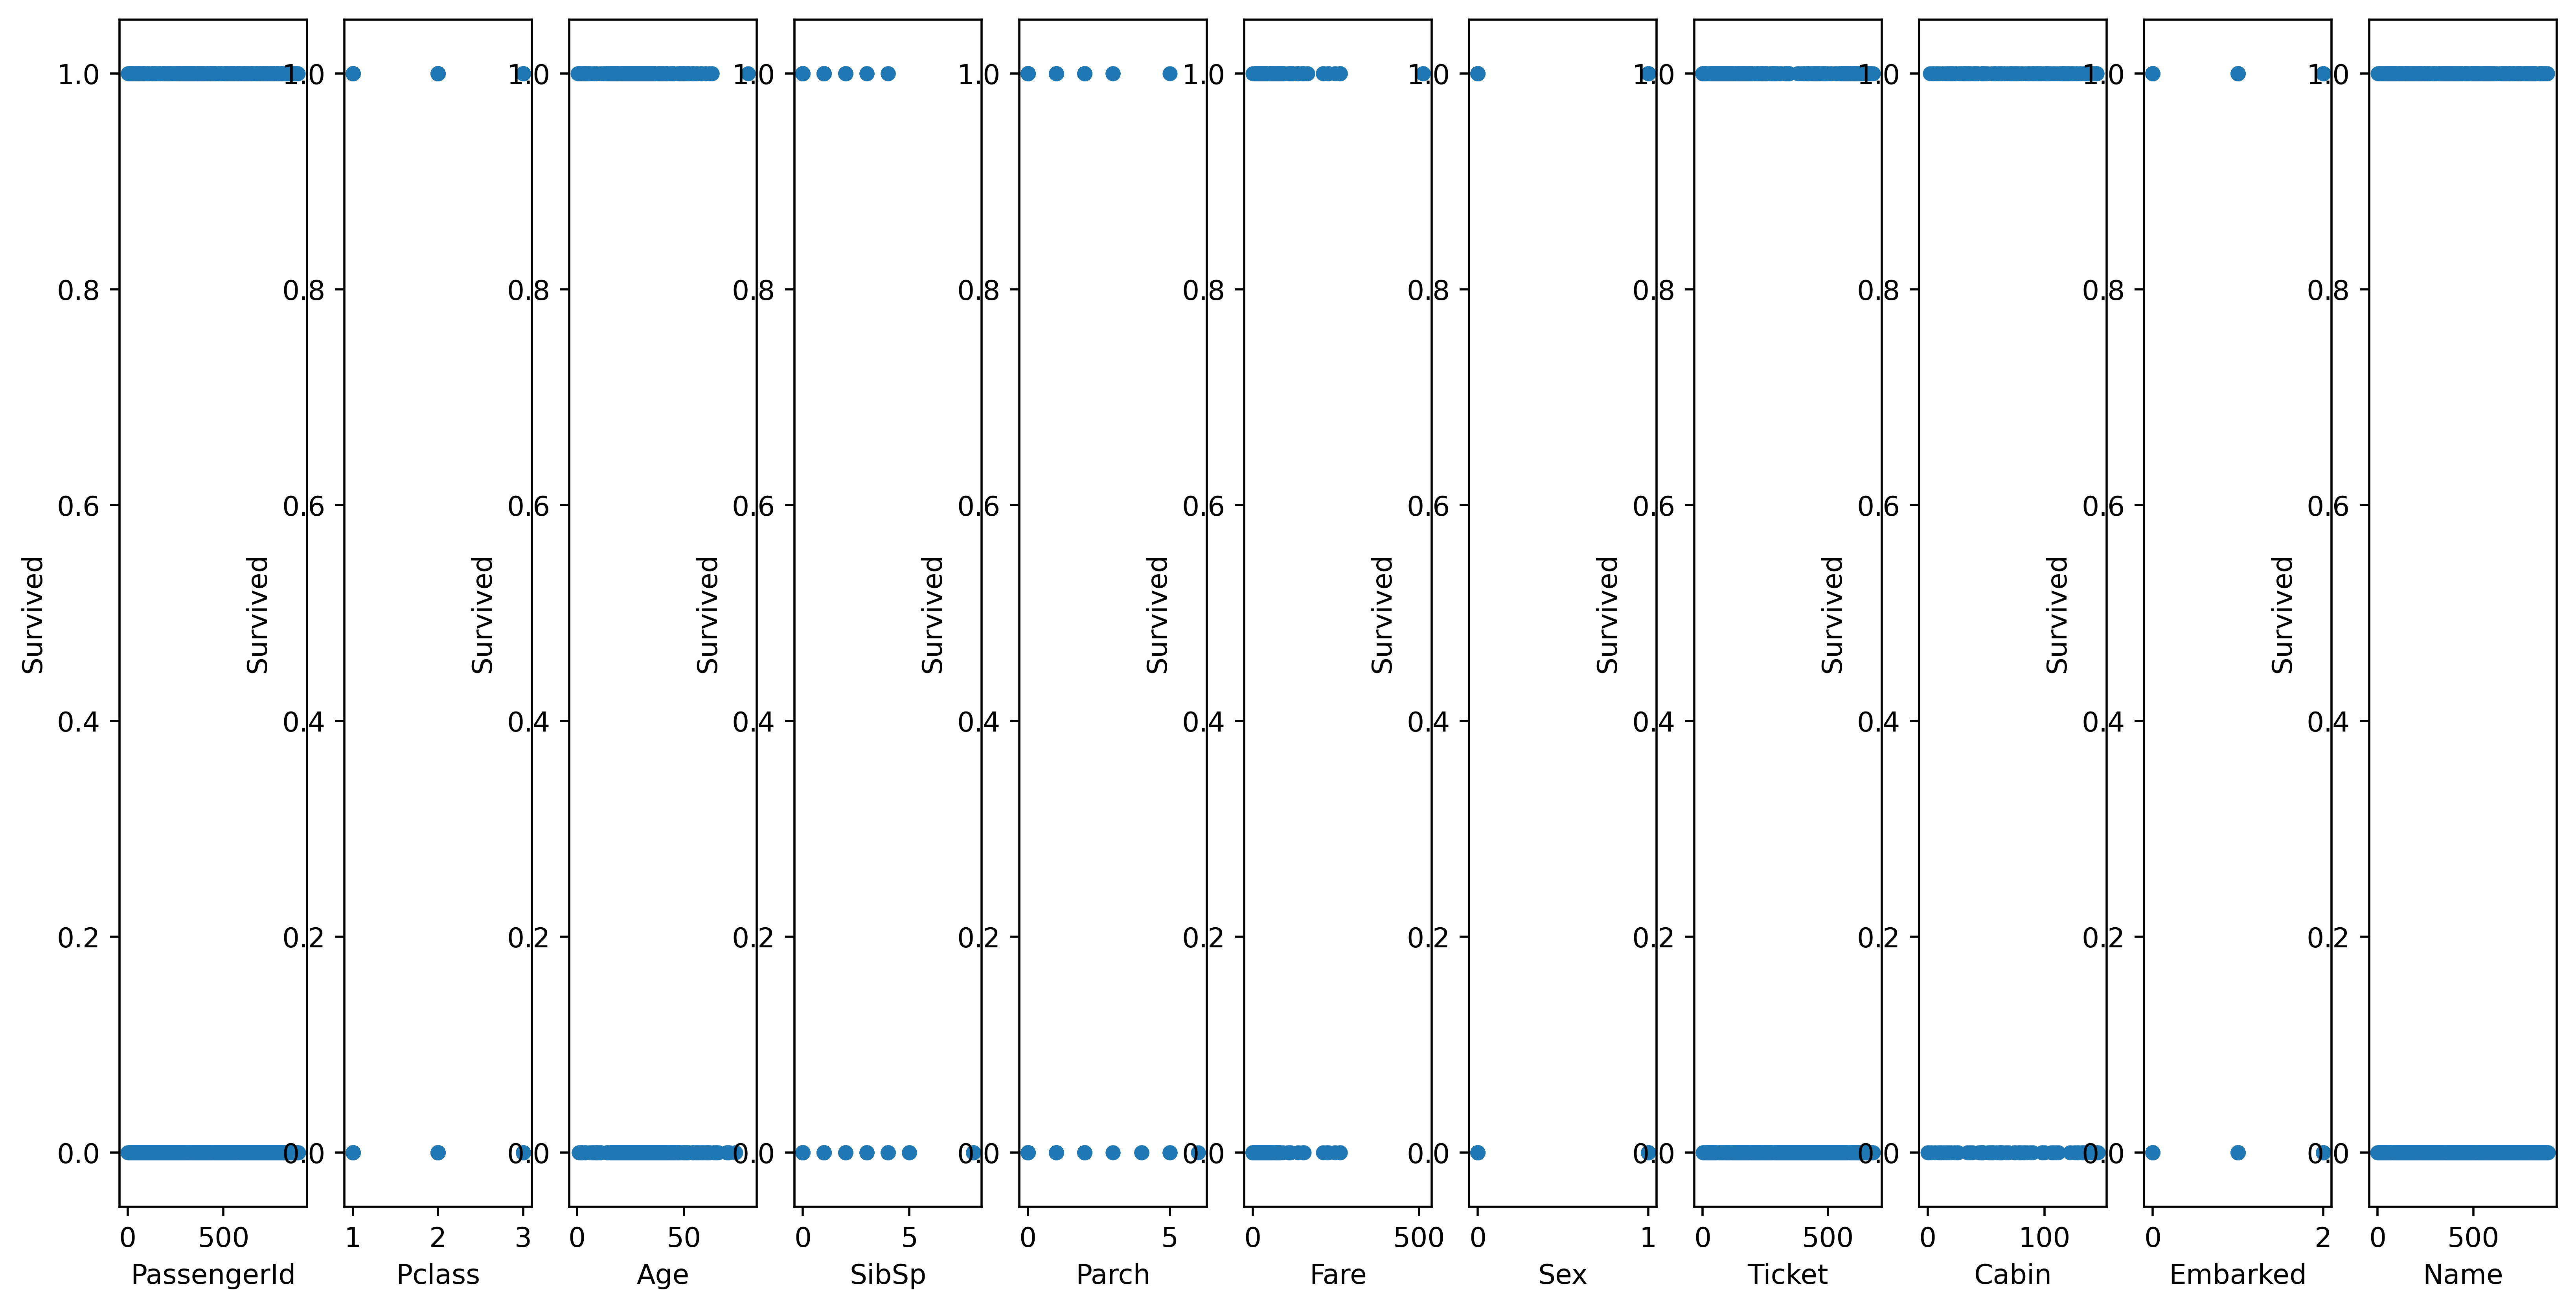

In [52]:
fig,axs=plt.subplots(1,11,figsize=(16,8),dpi=500)
data.plot(kind='scatter',x='PassengerId',y='Survived',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Pclass',y='Survived',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='Age',y='Survived',ax=axs[2],figsize=(16,8))
data.plot(kind='scatter',x='SibSp',y='Survived',ax=axs[3],figsize=(16,8))
data.plot(kind='scatter',x='Parch',y='Survived',ax=axs[4],figsize=(16,8))
data.plot(kind='scatter',x='Fare',y='Survived',ax=axs[5],figsize=(16,8))
data.plot(kind='scatter',x='Sex',y='Survived',ax=axs[6],figsize=(16,8))
data.plot(kind='scatter',x='Ticket',y='Survived',ax=axs[7],figsize=(16,8))
data.plot(kind='scatter',x='Cabin',y='Survived',ax=axs[8],figsize=(16,8))
data.plot(kind='scatter',x='Embarked',y='Survived',ax=axs[9],figsize=(16,8))
data.plot(kind='scatter',x='Name',y='Survived',ax=axs[10],figsize=(16,8))
fig.savefig('testdata24.jpg')

In [53]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Sex           -0.618921
Ticket         0.000246
Cabin          2.268926
Embarked      -1.264823
Name           0.000000
dtype: float64

In [54]:
df_features=data.drop('Survived',axis=1)

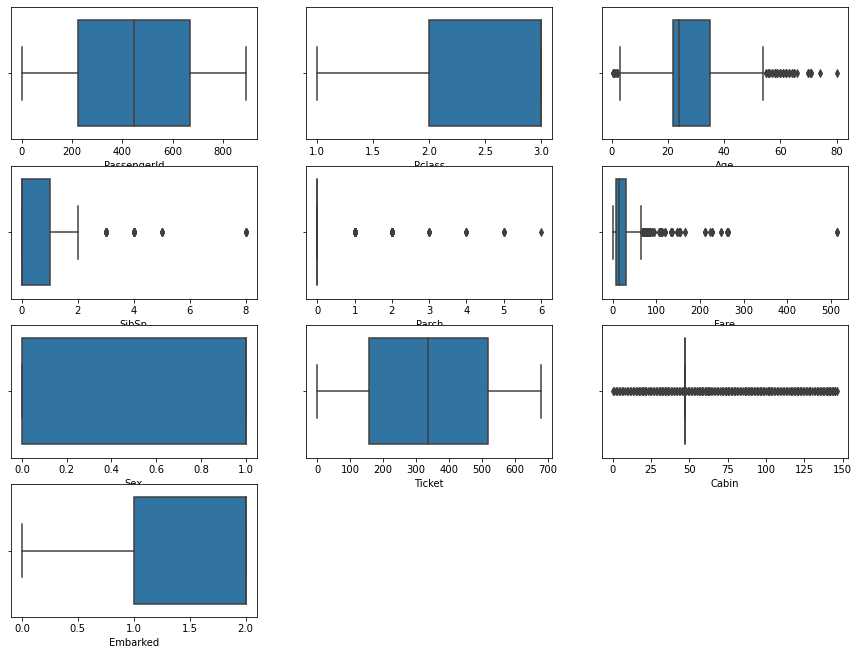

In [55]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<11:
        ax=plt.subplot(7,3,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

In [56]:
#find the IQR to identify outliers
#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1
print(iqr)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Sex              1.0000
Ticket         361.0000
Cabin            0.0000
Embarked         1.0000
Name           445.0000
dtype: float64


In [57]:
print(data < (q1 - 1.5 * iqr))

     PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare    Sex  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

     Cabin  Embarked   Name

In [58]:
#validating outliers
Age_high=(q3.Age+(1.5*iqr.Age))
Age_high

54.5

In [59]:
index=np.where(data['Age']>Age_high)
index

(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
        268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
        555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
        829, 851, 879], dtype=int64),)

this are the indexes in which data of item_visiblity i.e outlier is beyond the 54.5 so lets we will drop this indexes in next step

In [60]:
data=data.drop(data.index[index])
data.shape

(849, 12)

In [61]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
0,0,1,0,3,22.0,1,0,7.2500,1,523,47,2,108
1,1,2,1,1,38.0,1,0,71.2833,0,596,81,0,190
2,2,3,1,3,26.0,0,0,7.9250,0,669,47,2,353
3,3,4,1,1,35.0,1,0,53.1000,0,49,55,2,272
4,4,5,0,3,35.0,0,0,8.0500,1,472,47,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,886,887,0,2,27.0,0,0,13.0000,1,101,47,2,548
845,887,888,1,1,19.0,0,0,30.0000,0,14,30,2,303
846,888,889,0,3,24.0,1,2,23.4500,0,675,47,2,413
847,889,890,1,1,26.0,0,0,30.0000,1,8,60,0,81


In [62]:
SibSp_high=(q3.SibSp+(1.5*iqr.SibSp))
SibSp_high

2.5

In [63]:
index=np.where(data['SibSp']>SibSp_high)
index

(array([  7,  14,  22,  25,  47,  55,  59,  64,  67,  81,  84, 112, 151,
        156, 162, 166, 170, 172, 190, 218, 221, 248, 253, 263, 308, 324,
        356, 368, 391, 459, 463, 516, 517, 602, 610, 648, 650, 689, 748,
        753, 774, 780, 785, 806, 810, 822], dtype=int64),)

In [64]:
data=data.drop(data.index[index])
data.shape

(803, 12)

In [65]:
Parch_high=(q3.Parch+(1.5*iqr.Parch))
Parch_high

0.0

In [66]:
index=np.where(data['Parch']>Parch_high)
index

(array([  7,   9,  11,  20,  36,  49,  54,  65,  72,  78,  80,  81,  85,
        100, 105, 109, 117, 121, 126, 128, 129, 133, 135, 139, 143, 144,
        145, 148, 150, 155, 156, 160, 165, 168, 175, 204, 214, 215, 218,
        220, 221, 225, 227, 235, 236, 240, 257, 259, 265, 271, 272, 274,
        278, 279, 283, 286, 287, 290, 298, 305, 309, 313, 317, 319, 332,
        336, 344, 348, 361, 369, 370, 372, 376, 377, 388, 389, 390, 392,
        397, 398, 400, 402, 419, 422, 429, 435, 442, 450, 467, 473, 474,
        476, 477, 479, 483, 484, 489, 490, 491, 498, 507, 519, 520, 524,
        531, 533, 538, 546, 548, 553, 554, 556, 560, 571, 572, 577, 583,
        589, 601, 608, 609, 613, 616, 618, 624, 628, 635, 646, 661, 667,
        670, 674, 675, 678, 679, 687, 697, 702, 706, 710, 720, 722, 723,
        724, 737, 739, 742, 745, 748, 752, 764, 766, 767, 769, 770, 772,
        782, 784, 792, 797, 800], dtype=int64),)

In [67]:
data=data.drop(data.index[index])
data.shape

(642, 12)

In [68]:
Fare_high=(q3.Fare+(1.5*iqr.Fare))
Fare_high

65.6344

In [69]:
index=np.where(data['Fare']>Fare_high)
index

(array([  1,  21,  23,  39,  45,  46,  52,  87, 103, 111, 150, 153, 159,
        164, 176, 181, 182, 183, 189, 204, 205, 217, 218, 221, 229, 234,
        236, 237, 261, 265, 266, 270, 274, 280, 296, 323, 347, 348, 354,
        361, 362, 376, 382, 387, 390, 398, 425, 439, 450, 460, 462, 470,
        473, 478, 490, 501, 508, 515, 527, 533, 537, 548, 553, 571, 614],
       dtype=int64),)

In [70]:
data=data.drop(data.index[index])
data.shape

(577, 12)

In [71]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
0,0,1,0,3,22.0,1,0,7.2500,1,523,47,2,108
1,2,3,1,3,26.0,0,0,7.9250,0,669,47,2,353
2,3,4,1,1,35.0,1,0,53.1000,0,49,55,2,272
3,4,5,0,3,35.0,0,0,8.0500,1,472,47,2,15
4,5,6,0,3,24.0,0,0,8.4583,1,275,47,1,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,884,885,0,3,25.0,0,0,7.0500,1,650,47,2,793
573,886,887,0,2,27.0,0,0,13.0000,1,101,47,2,548
574,887,888,1,1,19.0,0,0,30.0000,0,14,30,2,303
575,889,890,1,1,26.0,0,0,30.0000,1,8,60,0,81


In [72]:
data.shape

(577, 12)

In [73]:
#devide data set into feature and label
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [74]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
0,1,3,22.0,1,0,7.2500,1,523,47,2,108
2,3,3,26.0,0,0,7.9250,0,669,47,2,353
3,4,1,35.0,1,0,53.1000,0,49,55,2,272
4,5,3,35.0,0,0,8.0500,1,472,47,2,15
5,6,3,24.0,0,0,8.4583,1,275,47,1,554
...,...,...,...,...,...,...,...,...,...,...,...
884,885,3,25.0,0,0,7.0500,1,650,47,2,793
886,887,2,27.0,0,0,13.0000,1,101,47,2,548
887,888,1,19.0,0,0,30.0000,0,14,30,2,303
889,890,1,26.0,0,0,30.0000,1,8,60,0,81


In [75]:
y

0      0
2      1
3      1
4      0
5      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-1.73357452,  0.67832969, -0.70653887, ..., -0.21757468,
         0.54106912, -1.36599911],
       [-1.72586273,  0.67832969, -0.25582253, ..., -0.21757468,
         0.54106912, -0.39651159],
       [-1.72200684, -2.04917017,  0.75828923, ...,  0.1755074 ,
         0.54106912, -0.71703603],
       ...,
       [ 1.68660213, -2.04917017, -1.04457612, ..., -1.0528741 ,
         0.54106912, -0.59436618],
       [ 1.69431391, -2.04917017, -0.25582253, ...,  0.4211837 ,
        -2.24640302, -1.4728406 ],
       [ 1.69816981,  0.67832969,  0.42025197, ..., -0.21757468,
        -0.85266695, -0.92280482]])

In [78]:
#lets split data in test and training set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR

In [80]:
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

LogisticRegression()

In [81]:
with open ('model_forprediction.say','wb')as f:
    pickle.dump(log_regression,f)
with open ('standardscalar.sav','wb')as f:
    pickle.dump(scalar,f)    

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
y_pred=log_regression.predict(x_test)

In [84]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7793103448275862

# cross validation of model

regularization

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [86]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [87]:
from sklearn.metrics import r2_score

In [89]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.23435088967974527

In [90]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.3066286008450268

# Ensemble technique

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [92]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [93]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)                         

R2score: 20.39430952380953
cross val score: 32.7147234840099
